In [78]:
%load_ext autoreload
%autoreload
import argparse
import copy
import json
import os
import sys

sys.path.append("../")
sys.path.append("../src")

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
from IPython import embed
from matplotlib import pyplot as plt
from torch.autograd import Variable


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
%autoreload
import src
from src.i3dense import I3DenseNet
from src.i3res import I3ResNet
from src.evaluator import Evaluator
from src.mit_data import MITDataset
from src.train import train, validation_loss
from src.video_handler import VideoViewer
import experiment.resnet2d_top20 as resnet2d
import experiment.resnet3d_top20 as resnet3d

In [47]:
cuda0 = torch.device("cuda:0")
mlb = resnet2d.mlb
model2d = copy.deepcopy(resnet2d.model)
model2d.to(cuda0)
original_model = copy.deepcopy(resnet2d.model)
model2d.load_state_dict(torch.load("../experiment/resnet2d_top20/run_0001/weights/weight2_000810.pt", map_location=cuda0))

## Visualize training loss

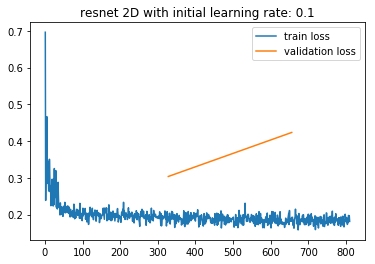

In [124]:
resnet2d_loss = pd.read_csv("../experiment/resnet2d_top20/run_0001/train_log.csv")
train_loss = resnet2d_loss[resnet2d_loss["split"] == "train"]
val_loss = resnet2d_loss[resnet2d_loss["split"] == "val"]
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.legend()
plt.title("resnet 2D with initial learning rate: 0.1")

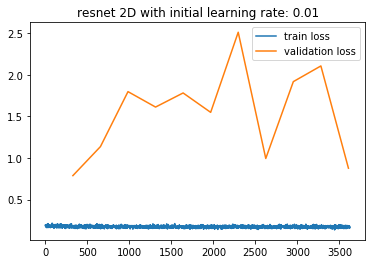

In [125]:
resnet2d_lowlr_loss = pd.read_csv("../experiment/resnet2d_top20/run_low_learning_rate/train_log.csv")
train_loss = resnet2d_lowlr_loss[resnet2d_lowlr_loss["split"] == "train"]
val_loss = resnet2d_lowlr_loss[resnet2d_lowlr_loss["split"] == "val"]
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.legend()
plt.title("resnet 2D with initial learning rate: 0.01")

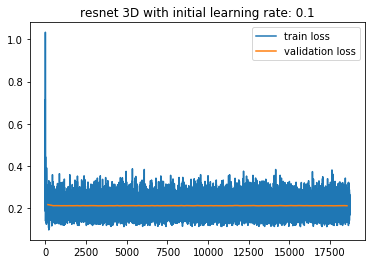

In [126]:
resnet_3d_loss = pd.read_csv("../experiment/resnet3d_top20/run_0001/1212_log.csv")
train_loss = resnet_3d_loss[resnet_3d_loss["split"] == "train"]
val_loss = resnet_3d_loss[resnet_3d_loss["split"] == "val"]
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.legend()
plt.title("resnet 3D with initial learning rate: 0.1")

In [127]:
dataloader_2d = resnet2d.dataloader

In [137]:
sample = next(iter(dataloader_2d))
image = sample["video"].numpy()[2].transpose([1,2,0])

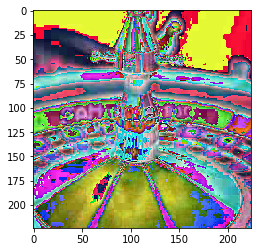

In [138]:
plt.imshow(image)

In [139]:
resnet3d_model = resnet3d.model
dataloader = resnet3d.val_dataloader

In [140]:
resnet3d_model.load_state_dict(torch.load("../experiment/resnet3d_top20/run_0001/weights/normalized_005000.pt", map_location="cpu"))

In [141]:
resnet3d_model.conv1.weight.data

tensor([[[[[-5.0554e-03, -9.3932e-03, -1.0820e-02,  ..., -1.0727e-02,
            -1.0197e-02, -9.9635e-03],
           [-1.0424e-02, -1.4725e-02, -1.3682e-02,  ..., -1.2221e-02,
            -1.2177e-02, -1.2076e-02],
           [-1.1602e-02, -1.4061e-02, -1.1951e-02,  ..., -1.0860e-02,
            -1.0726e-02, -1.2081e-02],
           ...,
           [-8.5223e-03, -1.3607e-02, -1.2695e-02,  ..., -1.0368e-02,
            -8.7469e-03, -8.0393e-03],
           [-7.4909e-03, -1.3648e-02, -1.1196e-02,  ..., -8.7882e-03,
            -8.0393e-03, -8.1197e-03],
           [-5.9090e-03, -1.0875e-02, -1.0513e-02,  ..., -7.7603e-03,
            -7.9900e-03, -6.5748e-03]],

          [[ 7.5060e-03,  7.9297e-03, -2.1683e-02,  ..., -5.0053e-02,
            -5.3747e-02, -8.0437e-02],
           [-6.4781e-03, -4.6433e-03,  5.8328e-03,  ..., -6.4347e-03,
            -3.1104e-02, -4.9755e-02],
           [ 1.3431e-02,  1.6372e-02,  9.2166e-03,  ...,  9.5859e-02,
             5.6212e-02,  4.3355e-02],
 

In [48]:
evalu = Evaluator(mlb)
evalu.run(model2d, resnet2d.val_dataloader)
evalu.save_result("../experiment/resnet3d_top20/")

208288768
inferencing number    0
208288768
inferencing number    1
208288768
inferencing number    2
208288768
inferencing number    3
208288768
inferencing number    4
208288768
inferencing number    5
208288768
inferencing number    6
208288768
inferencing number    7
208288768
inferencing number    8
208288768
inferencing number    9
113845248
inferencing number   10
113845248
inferencing number   11
113845248
inferencing number   12
113845248
inferencing number   13
113845248
inferencing number   14
113845248
inferencing number   15
113845248
inferencing number   16
113845248
inferencing number   17
113845248
inferencing number   18
113845248
inferencing number   19
113845248
inferencing number   20
113845248
inferencing number   21
113845248
inferencing number   22
113845248
inferencing number   23
113845248
inferencing number   24
113845248
inferencing number   25
113845248
inferencing number   26
113845248
inferencing number   27
113845248
inferencing number   28
113845248
infe

113845248
inferencing number  241
113845248
inferencing number  242
113845248
inferencing number  243
113845248
inferencing number  244
113845248
inferencing number  245
113845248
inferencing number  246
113845248
inferencing number  247
113845248
inferencing number  248
113845248
inferencing number  249
113845248
inferencing number  250
113845248
inferencing number  251
113845248
inferencing number  252
113845248
inferencing number  253
113845248
inferencing number  254
113845248
inferencing number  255
113845248
inferencing number  256
113845248
inferencing number  257
113845248
inferencing number  258
113845248
inferencing number  259
113845248
inferencing number  260
113845248
inferencing number  261
113845248
inferencing number  262
113845248
inferencing number  263
113845248
inferencing number  264
113845248
inferencing number  265
113845248
inferencing number  266
113845248
inferencing number  267
113845248
inferencing number  268
113845248
inferencing number  269
113845248
infe

113845248
inferencing number  482
113845248
inferencing number  483
113845248
inferencing number  484
113845248
inferencing number  485
113845248
inferencing number  486
113845248
inferencing number  487
113845248
inferencing number  488
113845248
inferencing number  489
113845248
inferencing number  490
113845248
inferencing number  491
113845248
inferencing number  492
113845248
inferencing number  493
113845248
inferencing number  494
113845248
inferencing number  495
113845248
inferencing number  496
113845248
inferencing number  497
113845248
inferencing number  498
113845248
inferencing number  499
113845248
inferencing number  500
113845248
inferencing number  501
113845248
inferencing number  502
113845248
inferencing number  503
113845248
inferencing number  504
113845248
inferencing number  505
113845248
inferencing number  506
113845248
inferencing number  507
113845248
inferencing number  508
113845248
inferencing number  509
113845248
inferencing number  510
113845248
infe

In [31]:
evalu_train = Evaluator(mlb)
evalu_train.run(model2d, resnet2d.dataloader)

94443520
inferencing number    0
94443520
inferencing number    1
94443520
inferencing number    2
94443520
inferencing number    3
94443520
inferencing number    4
94443520
inferencing number    5
94443520
inferencing number    6
94443520
inferencing number    7
94443520
inferencing number    8
94443520
inferencing number    9
94443520
inferencing number   10
94443520
inferencing number   11
94443520
inferencing number   12
94443520
inferencing number   13
94443520
inferencing number   14
94443520
inferencing number   15
94443520
inferencing number   16
94443520
inferencing number   17
94443520
inferencing number   18
94443520
inferencing number   19
94443520
inferencing number   20
94443520
inferencing number   21
94443520
inferencing number   22
94443520
inferencing number   23
94443520
inferencing number   24
94443520
inferencing number   25
94443520
inferencing number   26
94443520
inferencing number   27
94443520
inferencing number   28
94443520
inferencing number   29
94443520
i

94443520
inferencing number  249
94443520
inferencing number  250
94443520
inferencing number  251
94443520
inferencing number  252
94443520
inferencing number  253
94443520
inferencing number  254
94443520
inferencing number  255
94443520
inferencing number  256
94443520
inferencing number  257
94443520
inferencing number  258
94443520
inferencing number  259
94443520
inferencing number  260
94443520
inferencing number  261
94443520
inferencing number  262
94443520
inferencing number  263
94443520
inferencing number  264
94443520
inferencing number  265
94443520
inferencing number  266
94443520
inferencing number  267
94443520
inferencing number  268
94443520
inferencing number  269
94443520
inferencing number  270
94443520
inferencing number  271
94443520
inferencing number  272
94443520
inferencing number  273
94443520
inferencing number  274
94443520
inferencing number  275
94443520
inferencing number  276
94443520
inferencing number  277
94443520
inferencing number  278
94443520
i

94443520
inferencing number  498
94443520
inferencing number  499
94443520
inferencing number  500
94443520
inferencing number  501
94443520
inferencing number  502
94443520
inferencing number  503
94443520
inferencing number  504
94443520
inferencing number  505
94443520
inferencing number  506
94443520
inferencing number  507
94443520
inferencing number  508
94443520
inferencing number  509
94443520
inferencing number  510
94443520
inferencing number  511
94443520
inferencing number  512
94443520
inferencing number  513
94443520
inferencing number  514
94443520
inferencing number  515
94443520
inferencing number  516
94443520
inferencing number  517
94443520
inferencing number  518
94443520
inferencing number  519
94443520
inferencing number  520
94443520
inferencing number  521
94443520
inferencing number  522
94443520
inferencing number  523
94443520
inferencing number  524
94443520
inferencing number  525
94443520
inferencing number  526
94443520
inferencing number  527
94443520
i

94443520
inferencing number  747
94443520
inferencing number  748
94443520
inferencing number  749
94443520
inferencing number  750
94443520
inferencing number  751
94443520
inferencing number  752
94443520
inferencing number  753
94443520
inferencing number  754
94443520
inferencing number  755
94443520
inferencing number  756
94443520
inferencing number  757
94443520
inferencing number  758
94443520
inferencing number  759
94443520
inferencing number  760
94443520
inferencing number  761
94443520
inferencing number  762
94443520
inferencing number  763
94443520
inferencing number  764
94443520
inferencing number  765
94443520
inferencing number  766
94443520
inferencing number  767
94443520
inferencing number  768
94443520
inferencing number  769
94443520
inferencing number  770
94443520
inferencing number  771
94443520
inferencing number  772
94443520
inferencing number  773
94443520
inferencing number  774
94443520
inferencing number  775
94443520
inferencing number  776
94443520
i

94443520
inferencing number  996
94443520
inferencing number  997
94443520
inferencing number  998
94443520
inferencing number  999
94443520
inferencing number 1000
94443520
inferencing number 1001
94443520
inferencing number 1002
94443520
inferencing number 1003
94443520
inferencing number 1004
94443520
inferencing number 1005
94443520
inferencing number 1006
94443520
inferencing number 1007
94443520
inferencing number 1008
94443520
inferencing number 1009
94443520
inferencing number 1010
94443520
inferencing number 1011
94443520
inferencing number 1012
94443520
inferencing number 1013
94443520
inferencing number 1014
94443520
inferencing number 1015
94443520
inferencing number 1016
94443520
inferencing number 1017
94443520
inferencing number 1018
94443520
inferencing number 1019
94443520
inferencing number 1020
94443520
inferencing number 1021
94443520
inferencing number 1022
94443520
inferencing number 1023
94443520
inferencing number 1024
94443520
inferencing number 1025
94443520
i

94443520
inferencing number 1245
94443520
inferencing number 1246
94443520
inferencing number 1247
94443520
inferencing number 1248
94443520
inferencing number 1249
94443520
inferencing number 1250
94443520
inferencing number 1251
94443520
inferencing number 1252
94443520
inferencing number 1253
94443520
inferencing number 1254
94443520
inferencing number 1255
94443520
inferencing number 1256
94443520
inferencing number 1257
94443520
inferencing number 1258
94443520
inferencing number 1259
94443520
inferencing number 1260
94443520
inferencing number 1261
94443520
inferencing number 1262
94443520
inferencing number 1263
94443520
inferencing number 1264
94443520
inferencing number 1265
94443520
inferencing number 1266
94443520
inferencing number 1267
94443520
inferencing number 1268
94443520
inferencing number 1269
94443520
inferencing number 1270
94443520
inferencing number 1271
94443520
inferencing number 1272
94443520
inferencing number 1273
94443520
inferencing number 1274
94443520
i

[{'video': 'data/MIT_data/training/tuning/v019_0022.mp4',
  'label': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
  'score': array([ 0.03061162,  0.00615495,  0.02894715,  0.04603382,  0.08745308,
          0.10152245,  0.03645543,  0.02083457,  0.15401945,  0.01693348,
          0.06875134,  0.29756153,  0.02003231,  0.00775339,  0.01060395,
          0.00583902,  0.03494408,  0.07413126,  0.06404782,  0.0432728 ], dtype=float32)},
 {'video': 'data/MIT_data/training/bowing/v263_0028.mp4',
  'label': array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
  'score': array([ 0.02341484,  0.00908646,  0.03040496,  0.07689484,  0.11726815,
          0.10801949,  0.02936408,  0.06681278,  0.1327609 ,  0.01704492,
          0.0784547 ,  0.26250276,  0.03821301,  0.0094347 ,  0.02453036,
          0.00863386,  0.04494046,  0.1182

In [36]:
evalu.stats_setup()
auc = evalu.auc()
classes = evalu.mlb.classes_

In [39]:
list(zip(classes, auc))

[('baby', 0.49828974273331594),
 ('boat', 0.60316613399621222),
 ('boy', 0.42093299056690958),
 ('car', 0.53684302789760563),
 ('crowd', 0.60245307896675082),
 ('dog', 0.46016303324124569),
 ('girl', 0.49299879807692304),
 ('grass', 0.56717829936093822),
 ('hand', 0.48506827005525921),
 ('keyboard', None),
 ('machine', 0.65686717434764319),
 ('man', 0.48010143158640822),
 ('road', 0.58093454071969697),
 ('sky', 0.45872188683712123),
 ('smoke', 0.59492365056818186),
 ('snow', 0.54624829261131536),
 ('tree', 0.4973248908368092),
 ('water', 0.55385893397177421),
 ('woman', 0.4441305070237504),
 ('wood', 0.32338621290467628)]

In [43]:
result = evalu.result

In [44]:
result

[{'video': 'data/MIT_data/training/towing/v241_0031.mp4',
  'label': array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
  'score': array([ 0.01096082,  0.00150363,  0.01735255,  0.01059073,  0.01975096,
          0.01517881,  0.02372412,  0.00626165,  0.07158286,  0.00827464,
          0.02404212,  0.28825089,  0.0060346 ,  0.00286465,  0.00148665,
          0.00168009,  0.01009382,  0.03734997,  0.14153543,  0.0057164 ], dtype=float32)},
 {'video': 'data/MIT_data/training/towing/v241_0031.mp4',
  'label': array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
  'score': array([ 0.0119534 ,  0.00138217,  0.01727506,  0.01016484,  0.02032596,
          0.01500295,  0.02300626,  0.00588134,  0.0747303 ,  0.00743927,
          0.02375855,  0.28348652,  0.00534274,  0.00281574,  0.0013602 ,
          0.00153467,  0.00981039,  0.0372

In [85]:
sample_result = result[300]
vv = VideoViewer(sample_result["video"])

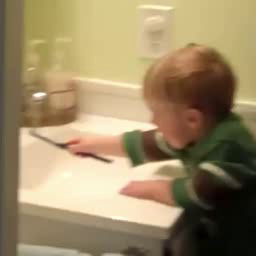

In [86]:
vv.image_as_PIL(0)

In [87]:
list(zip(classes, sample_result["score"]))

[('baby', 0.016106857),
 ('boat', 0.0025848646),
 ('boy', 0.02247913),
 ('car', 0.01310831),
 ('crowd', 0.022281334),
 ('dog', 0.02079536),
 ('girl', 0.027979391),
 ('grass', 0.0063434644),
 ('hand', 0.091478832),
 ('keyboard', 0.011597713),
 ('machine', 0.028360842),
 ('man', 0.27239534),
 ('road', 0.0076709078),
 ('sky', 0.0058020619),
 ('smoke', 0.0023293854),
 ('snow', 0.0030555034),
 ('tree', 0.01364847),
 ('water', 0.04865922),
 ('woman', 0.15766786),
 ('wood', 0.0099762119)]

In [88]:
list(zip(classes, sample_result["label"]))

[('baby', 0.0),
 ('boat', 0.0),
 ('boy', 1.0),
 ('car', 0.0),
 ('crowd', 0.0),
 ('dog', 0.0),
 ('girl', 0.0),
 ('grass', 0.0),
 ('hand', 0.0),
 ('keyboard', 0.0),
 ('machine', 0.0),
 ('man', 0.0),
 ('road', 0.0),
 ('sky', 0.0),
 ('smoke', 0.0),
 ('snow', 0.0),
 ('tree', 0.0),
 ('water', 0.0),
 ('woman', 0.0),
 ('wood', 0.0)]

In [91]:
evalu_train.stats_setup()
train_auc = evalu_train.auc()

In [92]:
list(zip(classes,train_auc))

[('baby', 0.71373524321089832),
 ('boat', 0.77834344755152152),
 ('boy', 0.57483797097507916),
 ('car', 0.76624302355493912),
 ('crowd', 0.71263041992187504),
 ('dog', 0.71517176821538797),
 ('girl', 0.70361708161399616),
 ('grass', 0.89495442708333339),
 ('hand', 0.65450510324726607),
 ('keyboard', 0.68225727546061277),
 ('machine', 0.67666218127033562),
 ('man', 0.6545425077996847),
 ('road', 0.80739248982513911),
 ('sky', 0.86645561667049631),
 ('smoke', 0.86281983553902608),
 ('snow', 0.865220700926154),
 ('tree', 0.63189885115088684),
 ('water', 0.76732769396616474),
 ('woman', 0.73782180013504051),
 ('wood', 0.80720257942302698)]

In [55]:
conv1 = model2d.conv1.weight.data.cpu().numpy()

In [54]:
print(id(model2d))
print(id(original_model))

139960453707536
139960334392848


In [103]:
sample_filter = conv1[1][0]

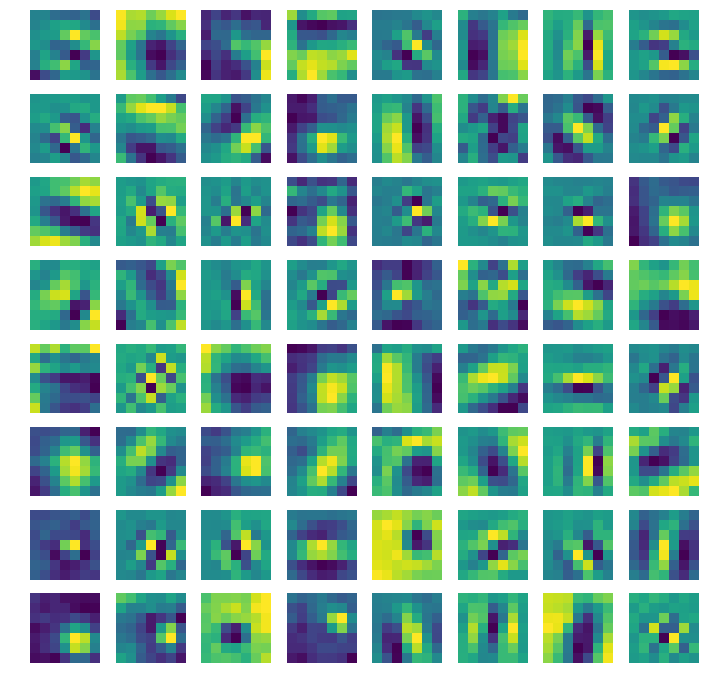

In [56]:
fig, axes = plt.subplots(8,8, figsize=(12,12))
for i in range(64):
    axes[i // 8][i % 8].imshow(conv1[i][0])
    axes[i // 8][i % 8].set_axis_off()

In [57]:
conv1 = original_model.conv1.weight.data.numpy()

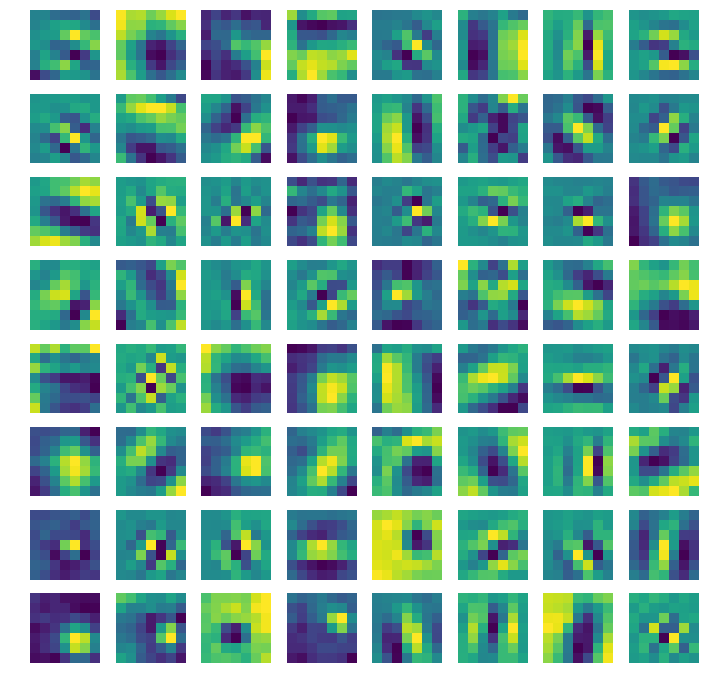

In [58]:
fig, axes = plt.subplots(8,8, figsize=(12,12))
for i in range(64):
    axes[i // 8][i % 8].imshow(conv1[i][0])
    axes[i // 8][i % 8].set_axis_off()

In [77]:
model2d.fc.weight.data

tensor([[ 0.0104, -0.0427,  0.0032,  ...,  0.0276, -0.0145,  0.0057],
        [-0.0111, -0.0242, -0.0462,  ..., -0.0280, -0.0253,  0.0005],
        [ 0.0151, -0.0649, -0.0030,  ...,  0.0052, -0.0041, -0.0185],
        ...,
        [ 0.0117, -0.0734, -0.0003,  ...,  0.0252,  0.0138, -0.0005],
        [-0.0270, -0.0323,  0.0643,  ..., -0.0060,  0.0126, -0.0182],
        [-0.0129, -0.0241, -0.0219,  ...,  0.0141, -0.0433, -0.0316]],
       device='cuda:0')

In [73]:
id(original_model.fc.weight.data)

139960438808152

In [75]:
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, 20)

In [76]:
model.fc.weight.data

tensor([[ 0.0069,  0.0190,  0.0040,  ..., -0.0098,  0.0005,  0.0162],
        [-0.0221, -0.0120, -0.0179,  ...,  0.0099,  0.0009, -0.0005],
        [-0.0061,  0.0170, -0.0156,  ...,  0.0042, -0.0076,  0.0042],
        ...,
        [ 0.0068,  0.0044,  0.0013,  ...,  0.0062,  0.0010,  0.0144],
        [-0.0169, -0.0070, -0.0206,  ..., -0.0017,  0.0173, -0.0126],
        [ 0.0066, -0.0119, -0.0128,  ..., -0.0049,  0.0126,  0.0085]])